## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
env = TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
# Print and validate the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
# Print and valudate all valid actions.
print(valid_actions(env.state))

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 1), (5, 3), (5, 5), (5, 7), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 9), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (8, 9)]


#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
# Returns an action based on epsilon greedy approach, 
# following either exploration or exploitation depending on the epsilon value

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
    # print('Z:',z)
        
    if z > epsilon:
        #Exploitation: this gets the action corresponding to max q-value of current state
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)
    else:
        #Exploration: randomly choosing and action
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [9]:
print(States_track)

defaultdict(<class 'dict'>, {})


In [10]:
# Initialise states to be tracked and will be plotted at a later stage
def initialise_tracking_states():

    #select some 4 Q-values
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-8-5-x-x-x-x',(5,1)),('x-3-x-x-x-x-2-x-x',(2,9)),('4-7-x-x-x-x-x-x-x',(3,1))]
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []  

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

# Define hyperparameters

In [13]:
# Define hyperparameters for the training

# Define the number of episodes for the training
EPISODES = 5000000

# Define the learning rate
LR = 0.3

# Define the discount factor
GAMMA = 0.9


max_epsilon = 1.0
min_epsilon = 0.001
# Epsilon decay rate
decay_rate = 0.001

# Number of episodes after which states_tracked wwill be saved
threshold = 10

# Number of episodes after which Q dictionary/table will be saved
policy_threshold = 300

In [14]:
initialise_tracking_states()

### Q-update loop ---write your code here

In [15]:
import time
start_time = time.time()

for episode in range(EPISODES):
    if (episode % 500000 == 0):
        print('Episode Number:', episode)
    ##### Start writing your code from the next line
    env = TicTacToe() # call the environment & initialize it's instance
    curr_state = env.state
    done_episode = False
    add_to_dict(curr_state)  # Add the current state to dictionary

    while (done_episode != True):
        curr_state1 = Q_state(curr_state)
        # Apply the epislon greedy method
        curr_action = epsilon_greedy(curr_state, episode)
        # Determine the reward
        next_state, reward, done_temp = env.step(curr_state, curr_action)
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)
        
        if (done_temp == 'Win' or done_temp == 'Tie'):
            done_game = True
        else:
            done_game = False
            
        # Update the rules
        if (done_game != True):
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)
                # Non terminal state
                # This call determines the best (greedy) action corresponding to the next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next]))) - Q_dict[curr_state1][curr_action])
        else:
            # Terminal state. no further action
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))
            done_episode = True

        #print(Q_dict)
        # Progress to the next state
        curr_state = next_state
        
    # States tracking to save states as per threshold
    #save_tracking_states()
    if ((episode+1)%threshold)==0:
        save_tracking_states()

    #if ((episode+1)% policy_threshold) == 0:  #every fixed number of episodes, the Q-dict will be saved
    #    save_obj(Q_dict,'Policy_Q_dict')  
          
elapsed_time = time.time() - start_time
print('Time duration in seconds:', elapsed_time)

# Save states, Policy - Q dictionary and Policy
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy_Q_dict')
save_obj(Q_dict,'Policy')

Episode Number: 0
Episode Number: 500000
Episode Number: 1000000
Episode Number: 1500000
Episode Number: 2000000
Episode Number: 2500000
Episode Number: 3000000
Episode Number: 3500000
Episode Number: 4000000
Episode Number: 4500000
Time duration in seconds: 3188.1424827575684


#### Check the Q-dictionary

In [16]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.6026695947468688,
              (0, 3): -0.8765844477622645,
              (0, 5): 0.34675841166526444,
              (0, 7): -0.2685236830280343,
              (0, 9): -0.1978890454407246,
              (1, 1): -1.6328708124645928,
              (1, 3): -1.2412412070748333,
              (1, 5): 5.697133796360108,
              (1, 7): -1.560317914511925,
              (1, 9): 1.6239900751142096,
              (2, 1): -1.1853131464950597,
              (2, 3): -1.5182445914954994,
              (2, 5): -0.7390782181102202,
              (2, 7): -1.47522593213455,
              (2, 9): 0.6717478458505279,
              (3, 1): -1.6249375262396741,
              (3, 3): -0.7920208722517809,
              (3, 5): -0.6781894987789,
              (3, 7): -1.3142834528854634,
              (3, 9): -1.0420911197312472,
              (4, 1): -1.5836938580945819,
              (4, 3): -0.9857050093007089,
              (4, 5): -1.

In [17]:
len(Q_dict)

409228

In [18]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

In [19]:
print(Q_dict['x-x-x-x-x-x-x-x-x'][6,5])

2.546982995282727


In [20]:
print(Q_dict['x-3-x-x-x-x-2-x-x'][2,9])

-0.7599


In [21]:
print(Q_dict['x-x-x-8-5-x-x-x-x'][5,1])

-0.51


In [22]:
print(Q_dict['4-7-x-x-x-x-x-x-x'][3,1])

-0.8319300000000001


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [23]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(*args, **kw)>

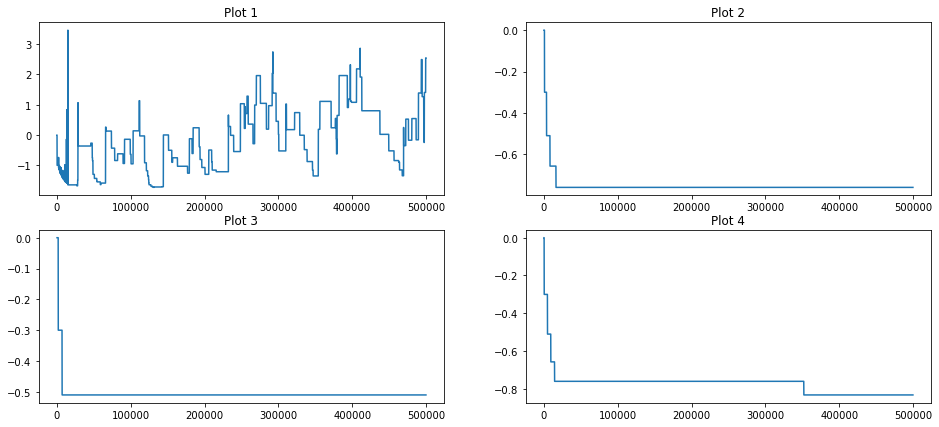

In [24]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.title('Plot 1')
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-x-x-2-x-x'][(2,9)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-x-x-2-x-x'][(2,9)]))
plt.title('Plot 2')
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-8-5-x-x-x-x'][(5,1)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-8-5-x-x-x-x'][(5,1)]))
plt.title('Plot 3')
plt.show

x_axis = np.asarray(range(0, len(States_track['4-7-x-x-x-x-x-x-x'][(3,1)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['4-7-x-x-x-x-x-x-x'][(3,1)]))
plt.title('Plot 4')
plt.show

### Epsilon - decay check

In [25]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

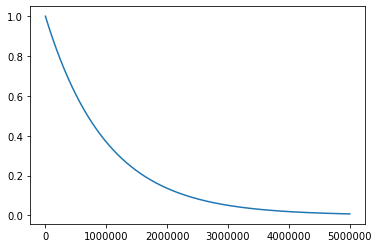

In [26]:
plt.plot(time, epsilon)
plt.show()